In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import os

In [2]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
df = pd.read_csv(os.path.join(output_dir, "combined_csv.csv"))
df['Time'] = df['Time'].astype('datetime64[ns]')
df['ts'] = df[['Time']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
df.head()

,Time,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization,ts
0,2020-09-14 17:01:34.398,0.257392,0.000089,0.0,33951.288889,0.066471,15747.533333,54180.222222,1.0,426.0,0.107691,6.0,11.811111,1.240458e+10,37.251644,1600102894
1,2020-09-14 17:01:49.398,0.348676,0.000000,0.0,14745.600000,0.076580,13445.644444,48827.111111,1.0,854.0,0.107901,6.0,10.716667,1.240458e+10,37.440750,1600102909
2,2020-09-14 17:02:04.398,1.103442,0.000000,0.0,14290.488889,0.076580,15635.400000,52507.400000,1.0,1420.0,0.103107,6.0,10.716667,1.240458e+10,37.440750,1600102924
3,2020-09-14 17:02:19.398,1.328542,0.000089,0.0,24576.000000,0.082302,13571.600000,48802.888889,1.0,2018.0,0.108230,6.0,12.738889,1.240458e+10,36.465056,1600102939
4,2020-09-14 17:02:34.398,2.251209,0.000089,0.0,11741.866667,0.082302,15876.311111,54117.933333,1.0,2645.0,0.102428,6.0,12.738889,1.240458e+10,36.465056,1600102954


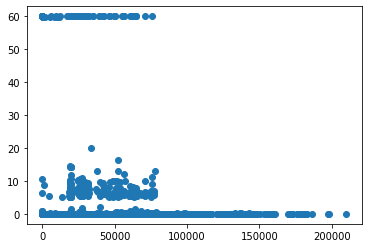

In [3]:
#plt.scatter(df['requests'],df['mem'])
#plt.scatter(df['requests'],df['cpu']) # remove responsetime > 10
plt.scatter(df['requests'],df['responsetime'])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df[['cpu', 'mem', 'replica', 'requests', 'totalcpu']], df['responsetime'], test_size=0.2))


from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train.values.reshape(-1,5), y_train)
    print(clf.score(X_test.values.reshape(-1,5), y_test.values.reshape(-1,1)),'\n')
    plt.show()

SVR()
-0.13184801117791434 

SGDRegressor()
-8.811269677643181e+30 

BayesianRidge()
0.4297519622462712 

LassoLars()
-0.003773926273202166 

ARDRegression()
0.40024510818386616 

PassiveAggressiveRegressor()
-16.900896289057084 

LinearRegression()
0.42917333394665447 



In [ ]:
from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,5), y_train)

In [ ]:
print('Score: ', reg.score(X_test.values.reshape(-1,5), y_test.values.reshape(-1,1)))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['cpu'], df['responsetime'], test_size=0.1))

from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,1), y_train)
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
x_line = np.arange(0,60).reshape(-1,1)
sns.regplot('cpu','responsetime', data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['mem'], df['responsetime'], test_size=0.1))

from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,1), y_train)
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
x_line = np.arange(0,15).reshape(-1,1)
sns.regplot('mem','responsetime', data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['replica'], df['responsetime'], test_size=0.1))

from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,1), y_train)
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
x_line = np.arange(0,50).reshape(-1,1)
sns.regplot('replica','responsetime', data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['requests'], df['responsetime'], test_size=0.1))

from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,1), y_train)
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
x_line = np.arange(0,80000).reshape(-1,1)
sns.regplot('requests','responsetime', data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

In [ ]:
%matplotlib notebook 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df['mem'], ys=df['cpu'], zs=df['requests'])

In [ ]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
df = pd.read_csv(os.path.join(output_dir, "combined_csv.csv"))

In [ ]:
df.head()

In [ ]:
data = df.loc[:, ['Time','cpu']]
#data=data.set_index(df.Time)

In [ ]:
data.head()

In [ ]:
data.plot()

In [ ]:
import fbprophet

In [ ]:
data = data.rename(columns={'Time': 'ds', 'cpu': 'y'})
df_prophet = fbprophet.Prophet(changepoint_prior_scale=0.10)
df_prophet.fit(data)

In [ ]:
from sklearn.preprocessing import StandardScaler
